# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13
Min. number of rooms: 4
Min. poverty level: 1.98
Min. student teacher ratio: 12.60
Max. number of rooms: 8
Max. poverty level: 37.97
Max. student teacher ratio: 22.00
Median number of rooms: 6
Median poverty level: 11.69
Median student teacher ratio: 19.10


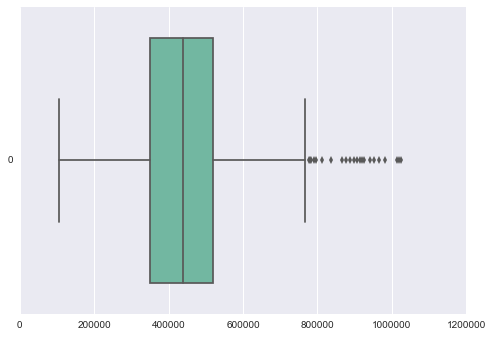

In [2]:
import seaborn as sns
# TODO: Minimum price of the data
minimum_price = np.amin(prices)

# TODO: Maximum price of the data
maximum_price = np.amax(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

#print features.head()

# Adding Additional Stats
min_rooms = np.amin(features.RM)
max_rooms = np.amax(features.RM)
median_rooms = np.median(features.RM)

min_poverty = np.amin(features.LSTAT)
median_poverty = np.median(features.LSTAT)
max_poverty = np.amax(features.LSTAT)

min_ptratio  = np.amin(features.PTRATIO)
median_ptratio = np.median(features.PTRATIO)
max_ptratio = np.amax(features.PTRATIO)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

# Printing Additional Stats


print "Min. number of rooms: {:,.0f}".format(min_rooms)
print "Min. poverty level: {:,.2f}".format(min_poverty)
print "Min. student teacher ratio: {:,.2f}".format(min_ptratio)


print "Max. number of rooms: {:,.0f}".format(max_rooms)
print "Max. poverty level: {:,.2f}".format(max_poverty)
print "Max. student teacher ratio: {:,.2f}".format(max_ptratio)

print "Median number of rooms: {:,.0f}".format(median_rooms)
print "Median poverty level: {:,.2f}".format(median_poverty)
print "Median student teacher ratio: {:,.2f}".format(median_ptratio)

ax = sns.boxplot(data=prices,orient = 'h',palette = 'Set2')



### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **

'RM' is the average number of rooms among homes in the neighborhood.Since house prices usually go up with the number of rooms (Number of rooms can be thought as a proxy for area - sqft.), it would be reasonable to assume a high 'RM' value means a affluent neighborhood, since people generally look for bigger homes. So I would expect Price to increase with 'RM' for a neighborhood - positive correlation

'LSTAT' is the percentage of homeowners considered "lower class". I would expect prices in a neighborhood to be negatively correlated to the LSTAT. If the earnings of the household is lower, the purchasing power is lower resulting in a smaller home and hence a lower price

'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood. A high 'PTRATIO' would mean that the students will not have the personalized care that parents would want. This will mean that the desirability of the neighborhood goes down with an increasing 'PTRATIO'. Therefore there will be a negative correlation between home prices in the neighborhood and the 'PTRATIO'

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [3]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [4]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:**

I think that the model has captured the variation of the target variable. The model is able to explain 92.3% of the variation of the target pice based on the features it has used. This is a good fit in general. However, we would need to know the following
1. Whether the residuals have any patterns when plotted - this could help in understanding whether the model is biased
2. In addition, we would need to know whether the application which uses this model can live with the unexplained variance - that is if the residuals are too large to be useful for the application.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [5]:
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state=43)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: **

The benefit of splitting a dataset into training and testing is to test the model's performance on an independent dataset . We can avoid overfitting the model. If we do not do this, we will end up overestimating the performance of the model, which might not scale when a new dataset is used.

Hence it is always better to train and test on different datasets. If we think, we will lose training on a few samples, we can use techniques like k-fold cross, where the data set is split evenely into different subsets and the training can be done on k-1 subsets, while testing is done on the last subset. This can be done by swapping out the test subset with a training subset the next time and so on, so that all subsets have been traine dand tested on. The final score for the estimator will be the average from all different subsets.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

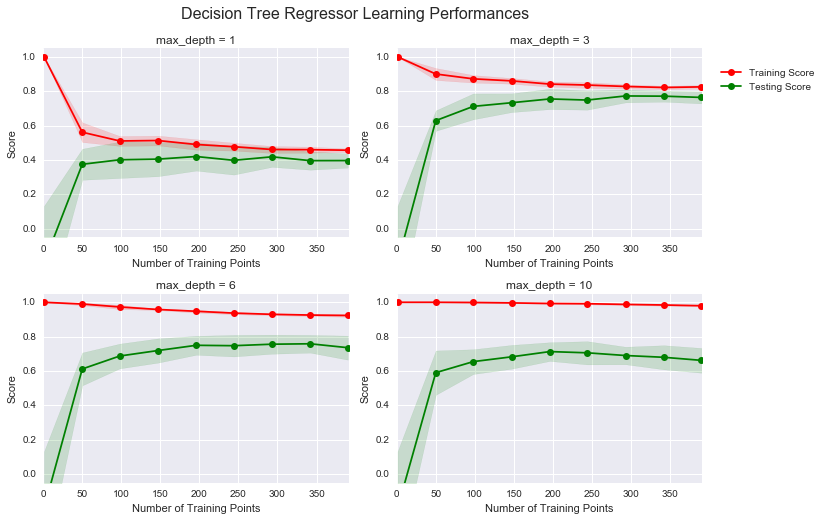

In [6]:
# Produce learning curves for varying training set sizes and maximum depths

vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **

Max_depth = 3

It can be seen from the graph, that training curve score actually decreases as the number of training points is increased from 0 to 350. However the testing curve actually benefits from an increase in the training samples. The reason is that the model starts to generalize well with an increase in the training points resulting in the training and testing curves converging as we increase the training size.

However, we can see that the testing score increases well from 10 to 200 in s significant way. After this point there is diminishing returns with the test scores completely flattening out above 300 samples indicating not much improvement in the model.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

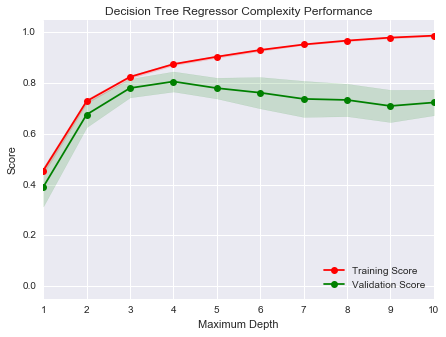

In [7]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **

When the model is trained at a maximum depth of 1, the model suffers from high bias, as the score is low both on the training and the test sets. The model does not explain a lot of the variance in the data as it is too simple (depth = 1).

Similarly, when depth is 10, the model seems to suffer from high variance. There is an increase in deivergenece between the training and the testing scores as the the depth increases from 4 to 10 - meaning that it looks we are overfitting the data in the training set which results in the fact that we do not generalize well as we scale up to the test data set.



### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **

From the graph, the divergence between the training and the test set decreases when we go from max depth of 1 to 4 and then starts to increase as max_depth increases. Therefore I would like to use max_depth of 3 or 4 to achieve the best bias-variance tradeoff. As can be seen from the graph, 3 almost performs as well as 4 does in terms of score but 4 performs slighlt better.

In addition for 4 the training and the testing curve trend in the same direction. Only after 5 do they start moving in opposite directions. For these reasons, I would go with a 'max_depth' of 4 for the model.


-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **

The grid search st s high level is a technique to arrive at the optimal parameters for an estimator which used to solve the problem. It works by systematically tuning a parameter of importance over a given value space and and simultaneously cross-validating the estimator with each paramter value to find out which value in the given parameter space can give the best estimator performace. This helps in arriving at an optimized learning algorithm.

The following are inputs to grid search
1. Estimator (Regression, SVC etc.)
2. Parameter space for hyper-parameter to be tuned (C, Kernel, Gamma etc.)
3. Search and select samples
4. Cross validation method (K-fold, Shuffled split etc.)
5. Score 


### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **

k-Fold cross validation is a training technique which is used to maximize the training data without compromising having an independent test data set to validate the model trained. In the case of K-fold cross validation the entire data set is split into k-folds. When training the model, k-1 folds are used for training while the last data set is used for testing. This procedure is repeated K times, where each time we have a unique test set and a different combination of the training data. 
So when we have finished this we would have k results for the each model tune (every value of the parameter). This would be averaged out to arrive at the performance for each value of the parameter.

This is especially useful for grid search since grid search tunes the parameter space to optimize the estimato parameters to get the best score. When grid search uses this, it is necessary to run each parameter setting over different training and test data sets to ensure that the value obtaioned generalizes over the given dataset well. Without doind this, if a single training dataset was used to arrive at the estimator, the estimator will not generalize well to a new dataset.

Therefore this technique is essential to arrive at a robust estimator model

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_iter'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [8]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'

from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor,params,scoring=scoring_fnc,cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    # Adding a print statement to get the scores for each max_depth parameter value
    
    #print grid.grid_scores_
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [9]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: **

The model indicates that the optimal max_depth is '4'. I had indicated 3-4 to be the optimal range with my personal pick being '4'. On running the model and printing out the score for each 'max_depth' value, we see the following results. As it can be seen the variation in the score between max_depth of 3 and 4 is minimal - from 0.713 to 0.717, which is negligible. So the judgement to be made is whether this change is enough to increase the complexity of the model - (Max_depth of 3 to 4). In addition we would have to see how robust the model is, when we change from 3 to 4.

Using 3 would have the benefit of simplifying the model and possibly less time, if the data set is huge. But considering that we do not have any of those issues, I would use 4. The reason as indicated earlier is that the test and the training curves start to move in opposite directions starting from 5. Even though there is diminishing returns as we move from 3 to 4, if there is no constraint on complexity and resources, 4 gives a better score.

[mean: 0.34147, std: 0.11996, params: {'max_depth': 1}, 
mean: 0.68600, std: 0.12209, params: {'max_depth': 2},
mean: 0.71290, std: 0.07882, params: {'max_depth': 3},
mean: 0.71566, std: 0.11147, params: {'max_depth': 4}, 
mean: 0.64937, std: 0.10503, params: {'max_depth': 5}, 
mean: 0.64566, std: 0.10174, params: {'max_depth': 6}, 
mean: 0.62736, std: 0.11579, params: {'max_depth': 7},
mean: 0.62079, std: 0.12834, params: {'max_depth': 8}, 
mean: 0.60169, std: 0.13027, params: {'max_depth': 9}, 
mean: 0.60223, std: 0.11446, params: {'max_depth': 10}]


### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

Predicted selling price for Client 1's home: $404,478.26
Predicted selling price for Client 2's home: $229,043.18
Predicted selling price for Client 3's home: $936,775.00


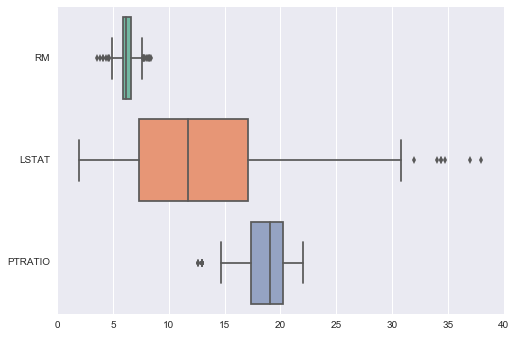

In [10]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

ax = sns.boxplot(data=features,orient = 'h',palette = 'Set2')

**Answer: **

After calculating the median for each feature - 'LSTAT','PTRATIO' and 'RM', the following are the results. As can be seen in the stats and the box plot above,

Client 1: 

Has a lower number of rooms (Lower than the 25th percentile - almost an outlier in the lower end) and is in a higher poverty level neighborhood compred to the average house. However, his neighborhood has a very good (low) student to teacher ratio. So overall his house price is in the lower 25-50 percentile range

Client2: 

Has bad metrics across the board. Given all this the price estimation is in line within half a sigma from the minimum house prices across Boston

Poverty level: Outlier at 32%
Number of rooms: Outlier with 4 rooms
Student to teacher ratio: Outlier at 22 to 1


Client 3:

Has the best metrics of the three clients across the board on all 3 features considered. Hence the model prediction which puts him in the top 5%ile of the prices (Within half a sigma away from the max) seems consistent to what we expect from the features

Poverty level: Almost an outlier on the low side (3%)
Number of rooms: Outlier on the high side with 8 rooms
Student to teacher ratio: Outlier on the low side at 12 to 1

Minimum price: 105,000
Maximum price: 1,024,800
Mean price: 454,342
Median price: 438,900

Min. number of rooms: 4
Max. number of rooms: 8
Median number of rooms: 6

Min. poverty level: 1.98
Max. poverty level: 37.97
Median poverty level: 11.69

Min. student teacher ratio: 12.60
Max. student teacher ratio: 22.00
Median student teacher ratio: 19.10





### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [11]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **

The model should not be used with the current training data in a real world setting. The model is as good as the data and since the data is from 25-30 years ago, the model will not hold up. In addition, this is from one location - Boston, and the features might not be exactly applicable or sufficient when looking at other areas of the city. For example, in a place like New York, proximity to subway stations might impact home prices. In other countries, availabilty of clean water might impact home prices. 

In addition the sensitivity of the model is 69044 dollars with a standard deviation of 165171 dollars - implying that a home buyer might be off by 69,044 dollars based on different runs of the model with different training data. This is almost half a sigma of variation (0.42 sigma to be exact), which might not accurate for use in a real world setting. 

Hence the features have to be optimized to the location and the robustness of the model improved before this can be used as a guideline for a real world setting.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.